<a href="https://colab.research.google.com/github/arpitgits/Stock-Market-predictions-using-different-ML-algorithms-for-swing-and-day-trading/blob/main/ML_Project_Testing_and_forecasting_stock_price_with_different_Algoritms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#file read
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


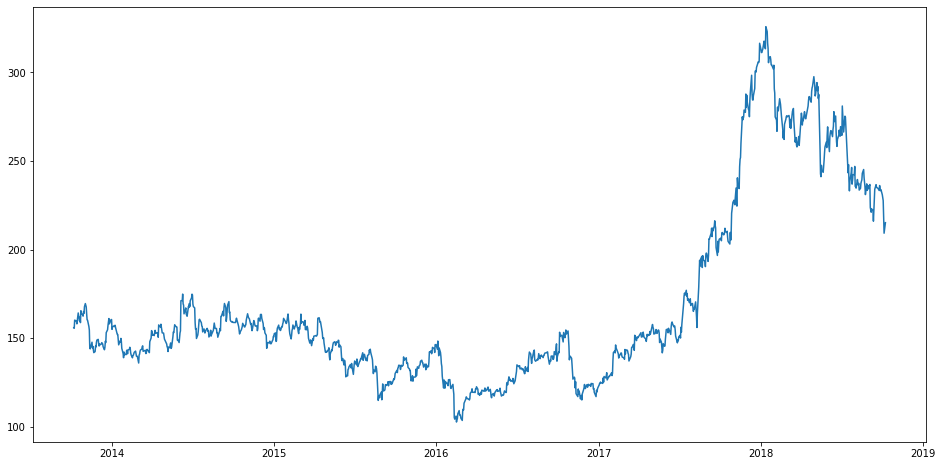

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')




#Moving Average


In [ ]:
data = df.so  rt_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

SyntaxError: ignored

In [ ]:
#Training and Testing data
train = new_data[:987]
testing = new_data[987:]

In [ ]:
new_data.shape, train.shape, testing.shape

((1235, 2), (987, 2), (248, 2))

In [ ]:
train['Date'].min(), train['Date'].max(), testing['Date'].min(), testing['Date'].max()

(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-10-06 00:00:00'),
 Timestamp('2017-10-09 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

In [ ]:
preds = []
for i in range(0,248):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [ ]:
#RMSE VALUE OF MOVING AVERAGE
rms=np.sqrt(np.mean(np.power((np.array(testing['Close'])-preds),2)))
rms

104.51415465984348

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


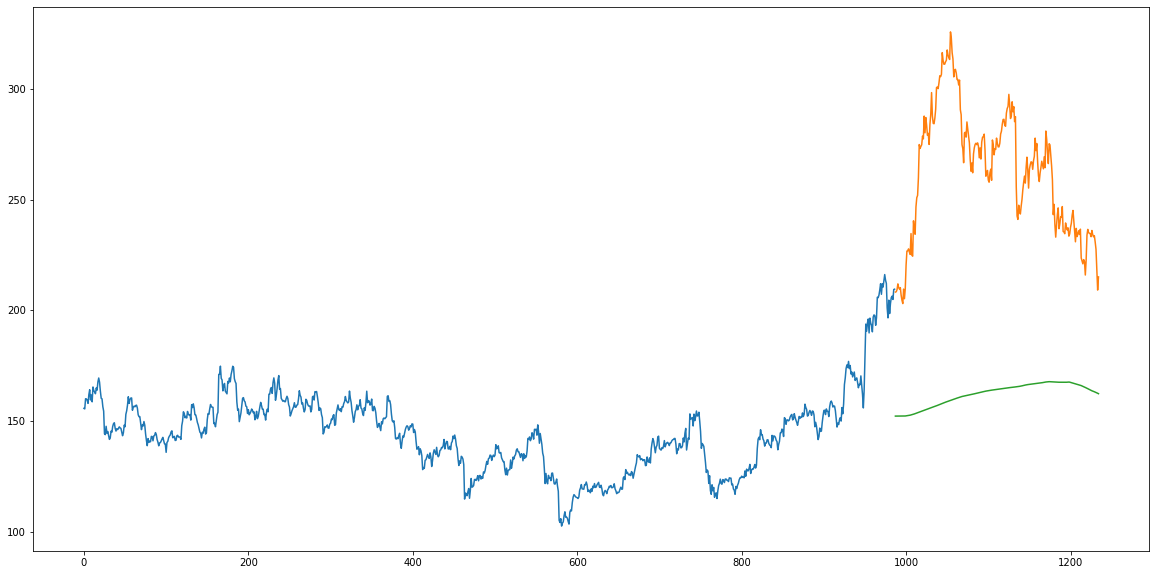

In [ ]:
testing['Predictions'] = 0
testing['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(testing[['Close', 'Predictions']])

# Linear Regression


In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
from fastai.tabular import *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:

train = new_data[:987]
testing = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_testing = testing.drop('Close', axis=1)
y_testing = testing['Close']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#RMSE VALUE OF LINEAR REGRESSION
preds = model.predict(x_testing)
rms=np.sqrt(np.mean(np.power((np.array(y_testing)-np.array(preds)),2)))
rms

121.16291596522808

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


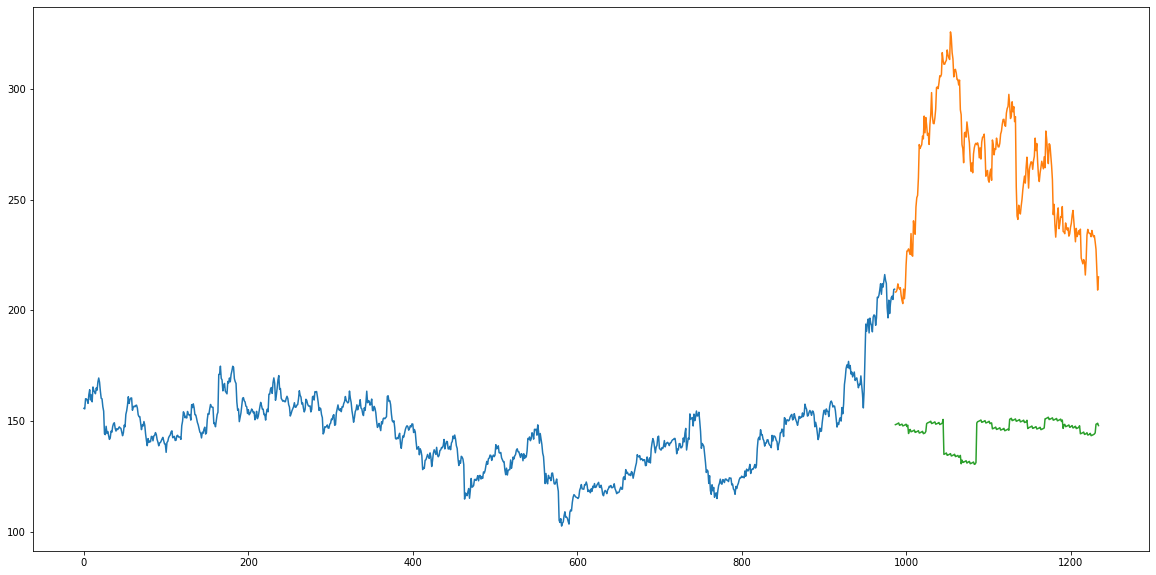

In [ ]:
testing['Predictions'] = 0
testing['Predictions'] = preds

testing.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(testing[['Close', 'Predictions']])

#K-nearest


In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_testing_scaled = scaler.fit_transform(x_testing)
x_testing = pd.DataFrame(x_testing_scaled)


params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)


model.fit(x_train,y_train)
preds = model.predict(x_testing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


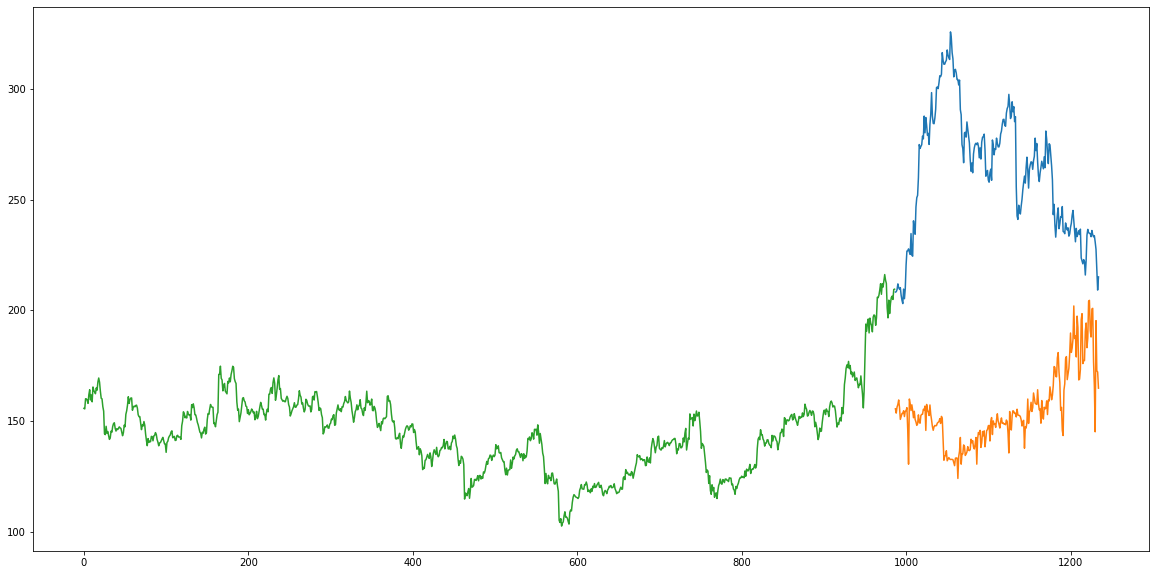

In [ ]:
testing['Predictions'] = 0
testing['Predictions'] = preds
plt.plot(testing[['Close', 'Predictions']])
plt.plot(train['Close'])

In [ ]:
#RMSE VALUE OF MOVING AVERAGE
rms=np.sqrt(np.mean(np.power((np.array(y_testing)-np.array(preds)),2)))
rms

115.17086550026721

In [ ]:
# !pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.5 MB/s 
     |████████████████████████████████| 9.8 MB 35.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Auto-ARIMA


In [ ]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
testing = data[987:]

training = train['Close']
testingation = testing['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = testing.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6097.127, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5773.037, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6098.343, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5683.554, Time=0.91 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5681.707, Time=0.75 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5771.244, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.62 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.72 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5683.552, Time=0.80 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5685.545, Time=2.30 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5683.

In [ ]:
#RMSE VALUE OF AUTO ARIMA
rms=np.sqrt(np.mean(np.power((np.array(testing['Close'])-np.array(forecast['Prediction'])),2)))
rms

54.54322744872866

KeyError: ignored

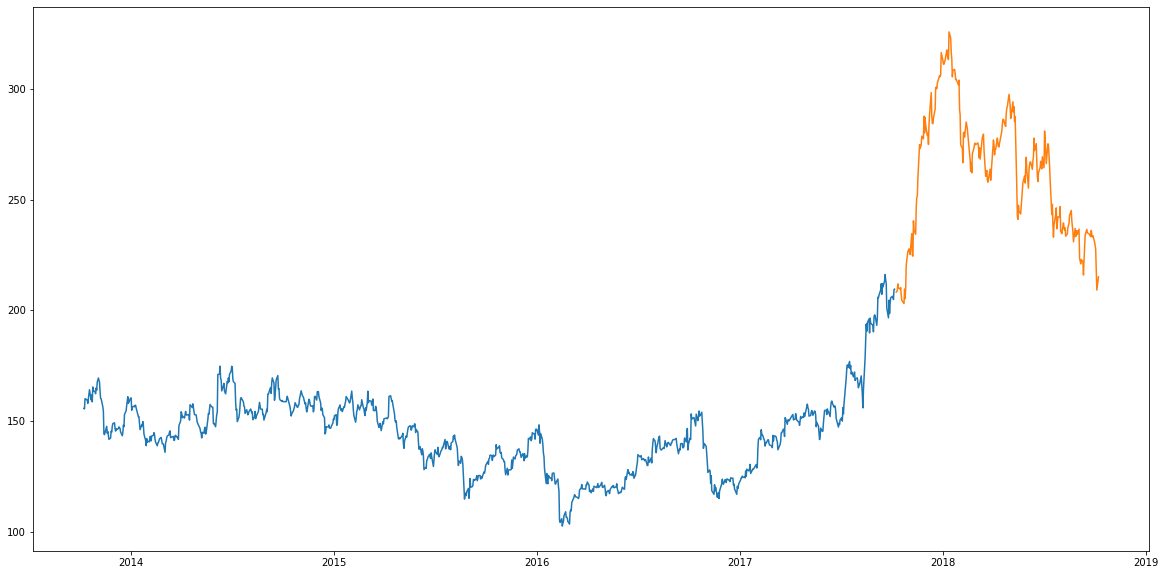

In [ ]:
plt.plot(train['Close'])
plt.plot(testing['Close'])
plt.plot(forecast['Prediction'])

#Prophet

In [ ]:
from fbprophet import Prophet


new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

train = new_data[:987]
testing = new_data[987:]
model = Prophet()
model.fit(train)

close_prices = model.make_future_dataframe(periods=len(testing))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#RMSE VALUE OF PROPHET
forecast_testing = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(testing['y'])-np.array(forecast_testing)),2)))
rms

57.31515213754124

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



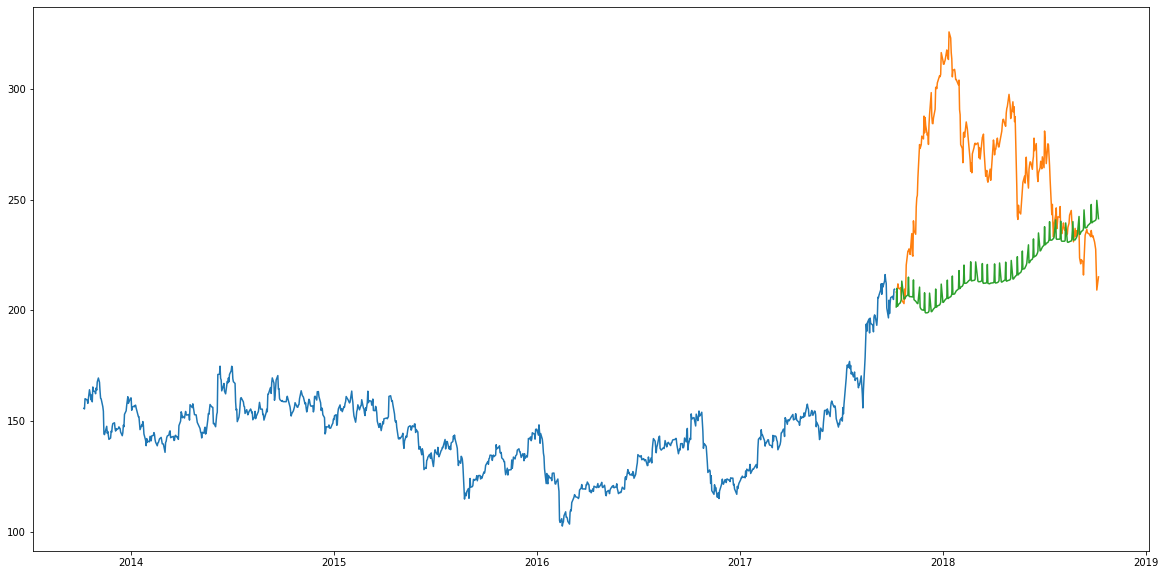

In [ ]:
testing['Predictions'] = 0
testing['Predictions'] = forecast_testing.values

plt.plot(train['y'])
plt.plot(testing[['y', 'Predictions']])

#LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

dataset = new_data.values

train = dataset[0:987,:]
testing = dataset[987:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = new_data[len(new_data) - len(testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

927/927 - 25s - loss: 9.9193e-04 - 25s/epoch - 27ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



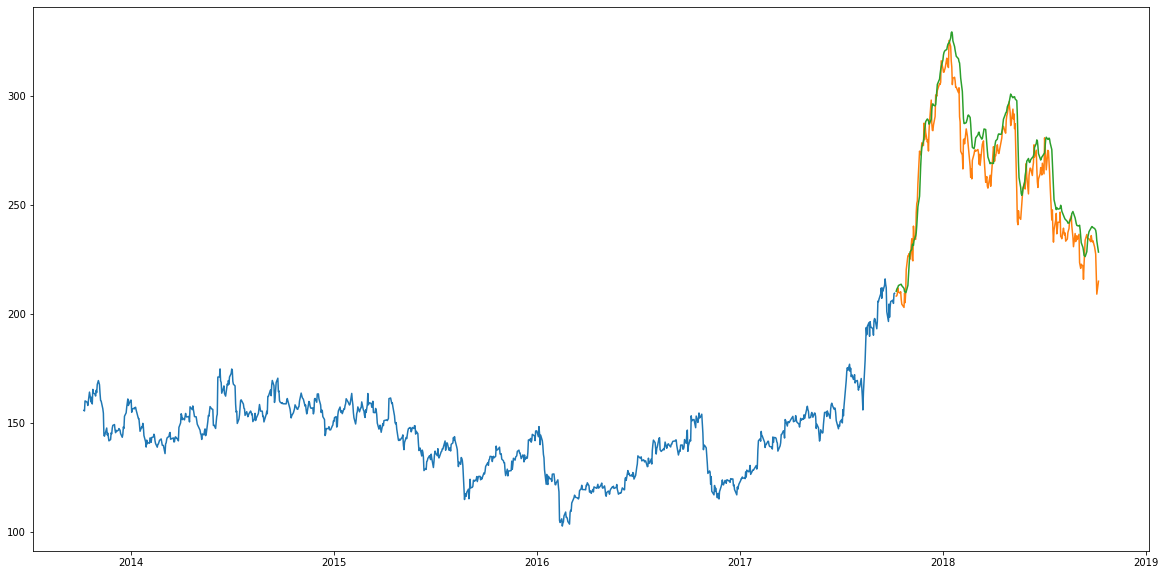

In [ ]:
train = new_data[:987]
testing = new_data[987:]
testing['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(testing[['Close','Predictions']])

In [ ]:
#RMSE VALUE OF LSTM
rms=np.sqrt(np.mean(np.power((testing-closing_price),2)))
rms

Close          11.766038
Predictions     0.000000
dtype: float64